# Data Mining & Machine Learning: Intro to Scikit-Learn

*N. Pol (2025)*

This lecture and notebook are based on the "Introduction to Scikit-Learn" lecture of of G. Richards' "Astrostatistics" class at Drexel University (PHYS 440/540, https://github.com/gtrichards/PHYS_440_540), which in turn draws in large part from https://github.com/jakevdp/ESAC-stats-2014/blob/master/notebooks/03.1-Scikit-Learn-Intro.ipynb. 

##### Reading:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 1: 1.5, 1.6.1, 1.6.2, 1.7.

---

***Exercises required for class participation are in <font color='red'>red</font>.***

---

**Quick software update:** Try the following task. In the cell below, place your cursor after `ls` and press `TAB`. **If nothing happens** then execute the subsequent cell that will downgrade the `jedi` package. **After you do the pip installation you will need to close down and re-open your notebook**. But if you see a dropdown menu of files and options appear then you don't need to do the pip installation.

In [1]:
# !%ls

In [2]:
# !pip install jedi==0.17.2

---
Today we will cover the basics of [Scikit-Learn](http://scikit-learn.org), a popular package containing a collection of tools for machine learning written in Python. 

For Scikit-Learn's own introduction, see [http://scikit-learn.org/stable/tutorial/basic/tutorial.html#](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#).

In general, we are interested in taking a set of $n$ samples of data and then predicting properties of unknown data.

In the simplest case the data will be one dimensional, but generally we will be dealing with multi-dimensional data.

As we saw in `Lecture_1a`, we can break machine learning into a few distinct categories. Common to all of these is the concept of **training sets** and **test sets**, which is just like they sound: training data will be used to make predictions about the test data.  

**The categories of maching learning are:** 
* [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning), where our training set has "labels".  The 
[Scikit-Learn tools for supervised learning](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) can further be broken into two subcategories:
    * [classification](https://en.wikipedia.org/wiki/Statistical_classification): where the data can be separated into two or more "classes" and we can use the labels from the training data to predict the labels for the test data.
    * [regression](https://en.wikipedia.org/wiki/Regression_analysis): where instead of having training data with discrete labels, the "truth" is a continuous property and we are trying to predict the values of that property for the test data.
    
    
* [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning), where our training set does not have labels, yet we would like to empirically determine something about the data.  The [Scikit-Learn tools for unsupervised learning](http://scikit-learn.org/stable/unsupervised_learning.html#unsupervised-learning) include those that 
    * can help determine if the data can be represented as belonging to distinct groups ([clustering](https://en.wikipedia.org/wiki/Cluster_analysis)).
    * can determine the distribution of the data within the parameter space ([density estimation](https://en.wikipedia.org/wiki/Density_estimation)).
    * can better visualize the data (and hope to learn something in so doing) by projecting a high-dimensional space down to 2-3 dimensions ([dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction)).

## About Scikit-Learn

Let's get to grips with using Scikit-Learn for machine learning/data mining by taking a look at two very simple machine learning tasks.

The first is a **classification** task: the figure shows a collection of two-dimensional data, colored according to two different class labels. We wish to determine a classification algorithm that can be used to draw a dividing boundary between the two clusters of points:

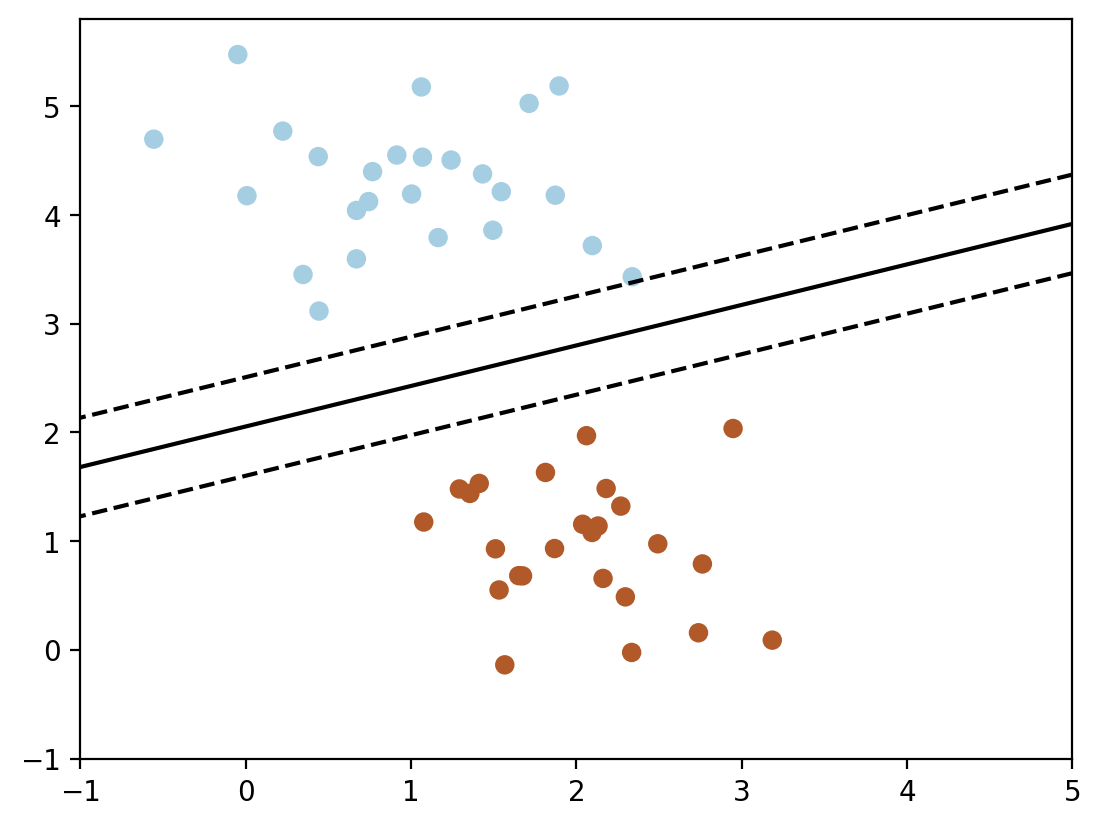

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

%run ./scripts/sklearn_ex1.py

This may seem like a trivial task, but it is a simple version of a very important concept. By drawing this separating line, we have **"learned"** a model that can ***generalize*** to new data. If you were to drop another point onto the plane that is unlabeled, this algorithm could now *predict* the color of the point.

The next simple task we'll look at is a **regression** task. This is a simple best-fit line to a set of data.

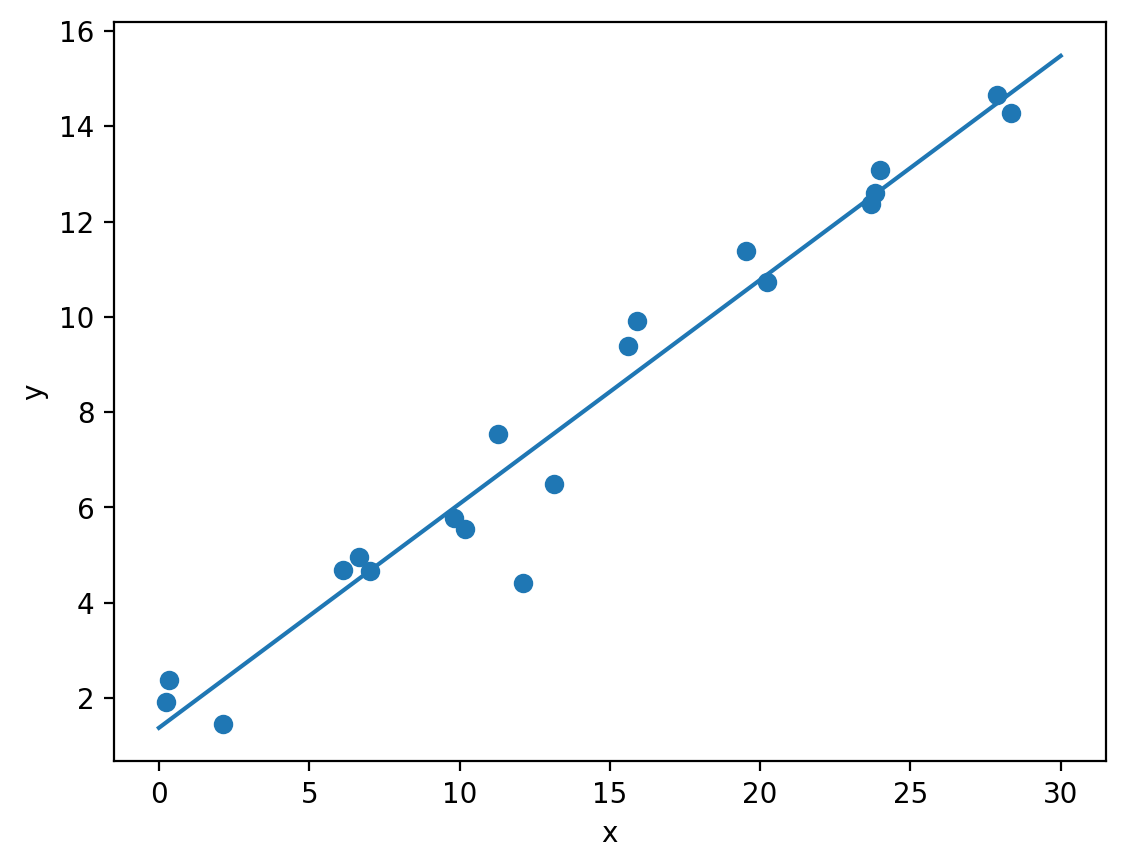

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

%run ./scripts/sklearn_ex2.py

- This is another example of fitting a model to data, such that the model can make generalizations about new data. 
- The model has been **learned** from the training data and can be used to predict the result of test data.
- We might be given an $x$-value, and the model would allow us to predict the $y$ value.  
- Again, this might seem like a trivial problem, but it is a basic example of a type of operation that is fundamental to machine learning tasks.

## Representation of Data in Scikit-learn

In order to use Scikit-Learn, we need to understand the input and output of its algorithms.

Most ML algorithms implemented in Scikit-Learn expect data to be stored in an **N-dimensional array or matrix**.  The arrays can be either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices. The size of the array is expected to be `[n_samples, n_features]`.

- **n_samples**   
  The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
  
  
- **n_features**  
  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

## A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the
iris data stored by Scikit-Learn.
The data consists of measurements of three different species of irises, which we picture here:

/var/folders/jr/6thm8wn52bv9_gbqq6c_j_ph0000gn/T/ipykernel_8605/2350653383.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import Image, display


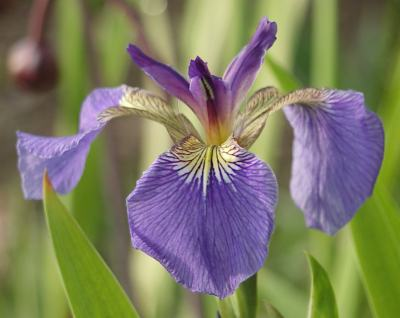

Iris Setosa



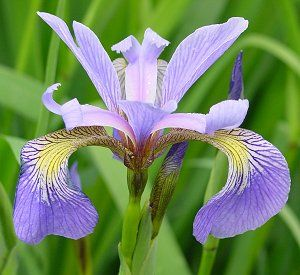

Iris Versicolor



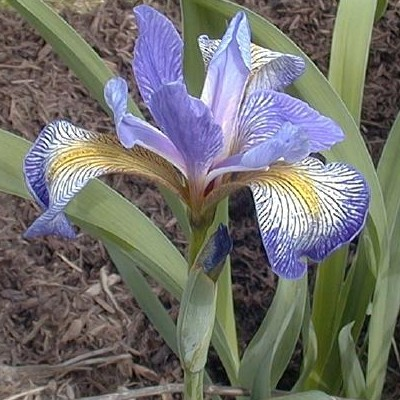

Iris Virginica


In [5]:
from IPython.core.display import Image, display
display(Image(filename='./figures/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='./figures/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='./figures/iris_virginica.jpg'))
print("Iris Virginica")

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- **Features/attributes in the Iris dataset:**
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

Scikit-learn refers to the "labels" as "targets".  So, every time you see "target", just think "label" and it will make more sense.  
- **The target classes are:**
  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``Scikit-Learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [6]:
# Execute this cell
from sklearn.datasets import load_iris
iris = load_iris()

`iris` is a dictionary, so we can look at the "keys" of the dictionary as follows:

In [7]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


* `target_names` were defined above
* `data` is the `[n_samples, n_features]` data array
* `target` is the list of labels for all of the entries in `data`
* `DESCR` is a README file with all of the information about the data set
* `feature_names` were defined above

In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

If you are curious, the data come from measurements made in Quebec by botanist Dr. Edgar Anderson and first used for Sir Ronald Fisher's 1936 [classification paper](http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf), see [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set).

We can query the database to determine the shape of the data and find that there are 150 objects with 4 measurements each:

In [9]:
print(iris.data.shape)
n_samples, n_features = iris.data.shape
print(n_samples, n_features)

(150, 4)
150 4


Now let's look at both the first entry in `data` and the full $N\times M$ data array. The first entry shows the values of the 4 features for the first object.

Note the structure of the full data array. It is an `n_samples` array of arrays with `n_features`.  Scikit-learn is very picky about this exact format and it isn't always what you would generate naturally (particulary in the case where we have only one feature). More on this later.

In [10]:
print(iris.data[0])
print(iris.data)

[5.1 3.5 1.4 0.2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5

We can also inpect the shape of the target (labels) array, which is an `n_samples`-dimensional array, print the values of those labels, and also learn how those numerical values relate to the names of the iris species:

In [11]:
# The shape of the target (labels) array is just an n_samples X 1 array
print(iris.target.shape)

# Here we see that the labels are given numerical values
print(iris.target)

# Use target_names to translate those numerical values to names
print(iris.target_names)
print(iris.target_names[0])

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
setosa


i.e., $0 = $ setosa, $1 = $ versicolor, and $2 = $ virginica.

This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot.

In [12]:
import numpy as np

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], 
            c=iris.target, cmap=plt.cm.get_cmap('viridis', 3))

plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

/var/folders/jr/6thm8wn52bv9_gbqq6c_j_ph0000gn/T/ipykernel_8605/3499906083.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c=iris.target, cmap=plt.cm.get_cmap('viridis', 3))


### Quick Exercise:

<font color='red'>Change `x_index` and `y_index` in the above script and find a combination of two parameters that maximally separate the three classes.</font>

This exercise is a preview of **dimensionality reduction**, which we'll see later.

In [13]:
x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], 
            c=iris.target, cmap=plt.cm.get_cmap('viridis', 3))

plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

/var/folders/jr/6thm8wn52bv9_gbqq6c_j_ph0000gn/T/ipykernel_8605/4210414653.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c=iris.target, cmap=plt.cm.get_cmap('viridis', 3))


## Other Available Data

comes in three flavors:
- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
  

- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
  
  
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

See [these docstrings]([documentation](http://scikit-learn.org/stable/datasets/index.html)) for all available `load_`, `fetch_`, and `make_` options.

In [14]:
from sklearn import datasets

A similar interface to [datasets](http://www.astroml.org/examples/datasets/#) is available in ``astroML``. See [these docstrings](https://www.astroml.org/modules/classes.html?highlight=astroml%20datasets#module-astroML.datasets) for more information.

In [15]:
# !pip install astroML

In [16]:
# from astroML import datasets

## Basic Principles of Machine Learning

Now we can dive into the basic principles of machine learning, and how to utilize them via Scikit-Learn.

After briefly introducing scikit-learn's ***Estimator*** object, we'll get an introduction to **supervised learning**, including ***classification*** and ***regression*** problems, and **unsupervised learning**, including ***dimensionality reduction*** and ***clustering*** problems.

### The Scikit-Learn Estimator Object

Every algorithm in scikit-learn generates an `Estimator` object. 

All the **parameters** of an estimator can be set when it is instantiated, and have suitable default values.  

Let's take a look at all of the parameters, attributes and methods in the [LinearRegression module](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# Instantiate a LinearRegression estimator object, call it `model`
model = LinearRegression()

# Check an individual parameters
# print(model.intercept_)

# Check all of the parameters
# print(model.coef_)

With our model instantiated, we are ready to input some data.  So let's make a simple test case.

In [19]:
x_train = np.arange(10)    # An array of 10 integers
y_train = 2 * x_train + 1  # Some operation performed on that array
print(x_train)
print(y_train)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


In [20]:
plt.plot(x_train, y_train, 'o');

Now we'd like to `fit` that data to determine the model parameters that we would need to `predict` the $y$ values of any new measurement of $x$.  

The general code syntax for this sort of thing might be

```
lsqfit x_train y_train x_test y_pred
```

Scikit-Learn breaks this into two steps:
1. **fitting**
2. **predicting**
    
where the syntax of the fit looks like:

In [21]:
# fit the model on our data
model.fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[0 1 2 3 4 5 6 7 8 9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Bet you had some problems, right!?

- That's because `Scikit-Learn` wants the training **features** as a multi-dimensional array. Even if there is only one dimension, like we have here. 


- In that case, it is looking for a column array instead of the row array that we gave it, i.e. instead of an array of shape $(10,)$ which is the standard, it wants an array of shape $(10,1)$.


- Their standard syntax is to call this multi-dimensional training array, $X$, (capital $x$) and the training "labels" (which can be continuous) simply $y$.


- If your $x$ is 1-D, then we have to turn it into something that looks like it is $N$-D.  All of the following yield the same result.  I personally like the last one since it is (sort of) readable.  It basically says to take an $x$ array and add another `feature` that is blank.  The `reshape` syntax looks like it used to be widely used, but has now mostly been replaced with the `np.newaxis` syntax.  


- The effect of all three is to turn $x$ into a `n_samples` by 1-D *array* rather than an array of `n_samples`.

In [22]:
# The input data for sklearn must be 2D: (samples == N x features == 1)
print(x_train)

# All of these give the same result.  I'll adopt the convention from the last one.
print(x_train.reshape(-1,1))
print(x_train[:, np.newaxis])
print(np.atleast_2d(x_train).T)
print(x_train[:, None])

X = x_train[:, None]
y = y_train
print(y)

[0 1 2 3 4 5 6 7 8 9]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


Note that you can produce random $X$s in the correct format with
```
N = 10
X = np.random.random(size=(N, 1))
```

And you can go backwards with
```
X.squeeze()
```

In [23]:
# Now we can fit the model on our data
model.fit(X, y)

LinearRegression()

**Estimated Model parameters**

All the estimated parameters are attributes of the estimator object ending with an *underscore*:

In [24]:
# Let's look at the fit parameters, which are indicated by an underscore at the end
print(model.coef_)
print(model.intercept_)

[2.]
0.9999999999999982


The model found a line with a slope 2 and intercept 1, as we'd expect. Awesome!

### Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both ***features*** and ***labels***. The task is to construct an estimator that is able to predict the label of an object given the set of features. A relatively simple example is predicting the species of iris given a set of measurements of its flower.

Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
  
  
- given a photograph of a person, identify the person in the photo.


- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).

The commonality of these tasks is that there are one or more unknown properties of an object that must be determined from other observed quantities.

Supervised learning is further broken down into two categories, 
1. **classification** (discrete labels)
2. **regression** (continuous labels)

For example, the task of determining whether an object is a star, a galaxy, or a quasar is a classification problem: the label is from three distinct categories. On the other hand, we might wish to estimate the age of an object based on such observations: this would be a regression problem, because the label (age) is a continuous quantity.

### Classification Example
[K nearest neighbors (kNN)](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem.  First see if you can do a kNN fit on the iris data using the 5 nearest neighbors.

In [25]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5) #Complete with number of neighbors

# fit the model
knn.fit(X, y)

KNeighborsClassifier()

<font color='red'>Now see if you can figure out what kind of iris has a 3cm x 5cm sepal and 4cm x 2cm petal using the predict method? Remember to be careful constructing your $X$ array.</font>  

This is tricker than before. We now have multiple features, but we still need those in a `n_samples=1` by `n_feaures=4` array.

- **Features/attributes in the Iris dataset:**
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

In [26]:
measurements = [3,5,4,2]   # List of measurements for 1 iris
print(measurements)
Xtest = np.array(measurements)
Xtest = Xtest[None,:] # Convert the 4-element numpy array into a 1x4 array.
print(Xtest)

[3, 5, 4, 2]
[[3 5 4 2]]


<font color='red'>Once $X$ is properly formatted, go ahead and do the prediction.  

Can you output the *name* rather than the index of the iris type?</font>

In [27]:
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict(Xtest)
print(result)

print(iris.target_names[result]) # Complete such that the name rather than the number is output.

[1]
['versicolor']


In some sense the whole point of classification is that there isn't necessarily going to be a cut and dry "right" answer. So, we might want to do probabilistic predictions instead.

In [28]:
knn.predict_proba(Xtest)

array([[0. , 0.8, 0.2]])

We could even visualize the full parameter space so that we could determine the classification by eye.  To make things simpler, we have done this in 2-D rather than 4-D.  Note that it isn't perfect, but does a really good job of classifying at least the red sources.

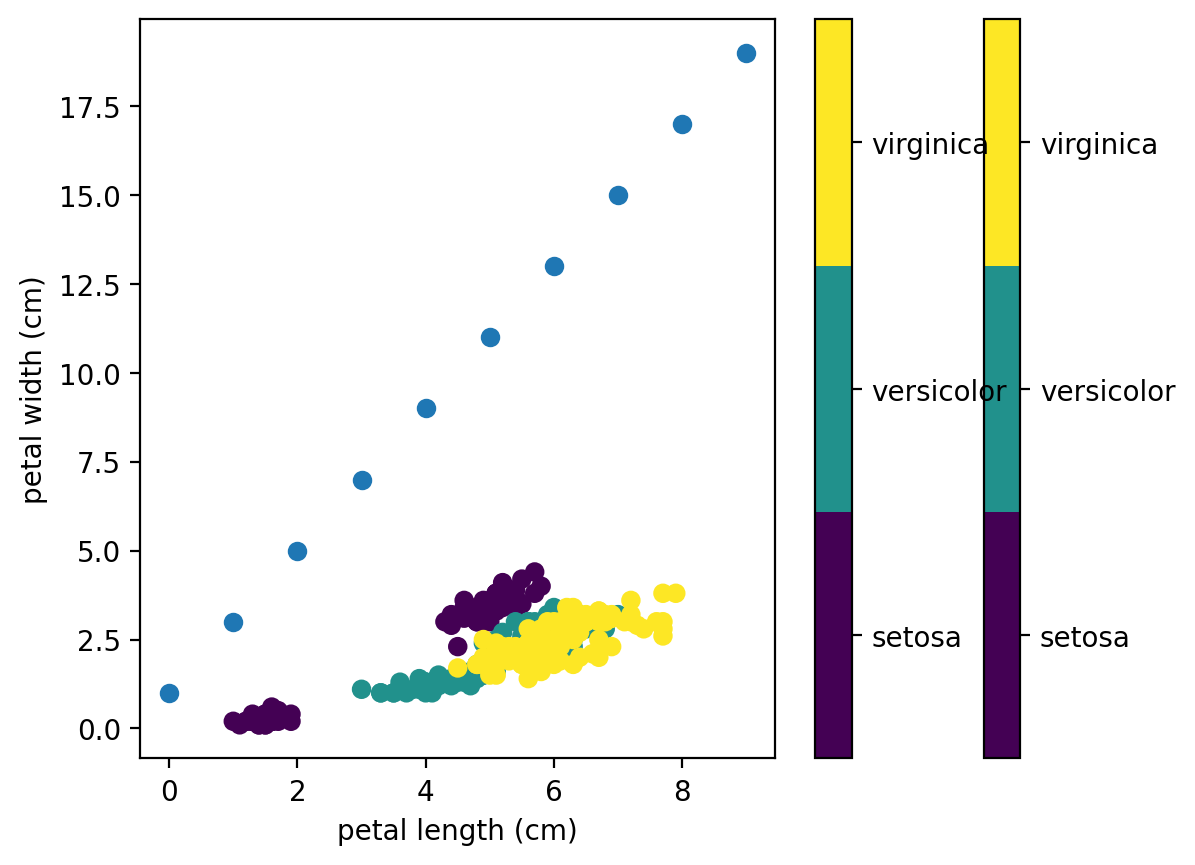

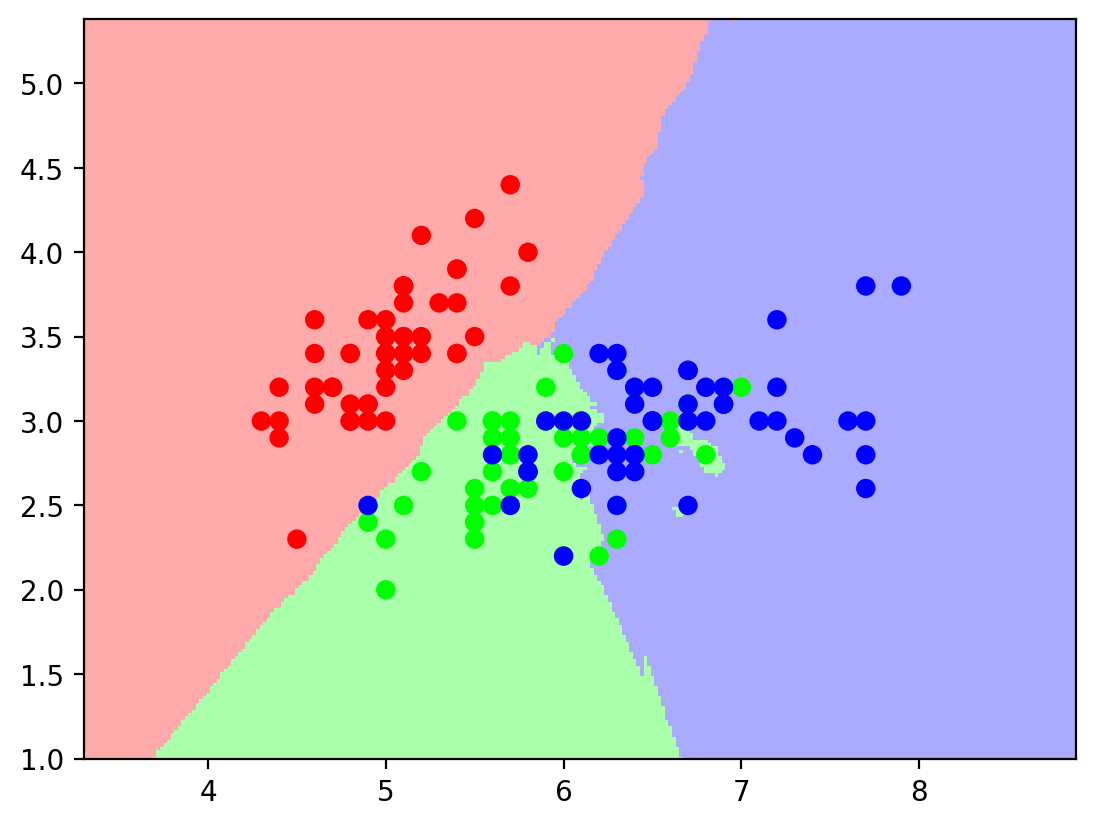

In [29]:
%run ./scripts/sklearn_ex3.py

### Exercise

<font color='red'>Let's do the same, but now using [``sklearn.svm.SVC``](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to predict what type of iris has a 3cm x 5cm sepal and 4cm x 2cm petal?</font>

This is **Support Vector Machine Classification**. But you don't have to know what it is now in order to use it.

*Careful -- our plot above overwrote some things. So, best to start from scratch and reload the iris data set and redefine the test input.*

In [30]:
from sklearn.svm import SVC
iris = datasets.load_iris()
X, y = iris.data, iris.target
Xtest = np.array([[3,5,4,2],])

In [31]:
model = SVC()
model.fit(X,y)
result = model.predict(Xtest)
print(iris.target_names[result])

['versicolor']


### Regression Example

OK, that was a **classification** example. The simplest possible **regression** example is just fitting a line to data:

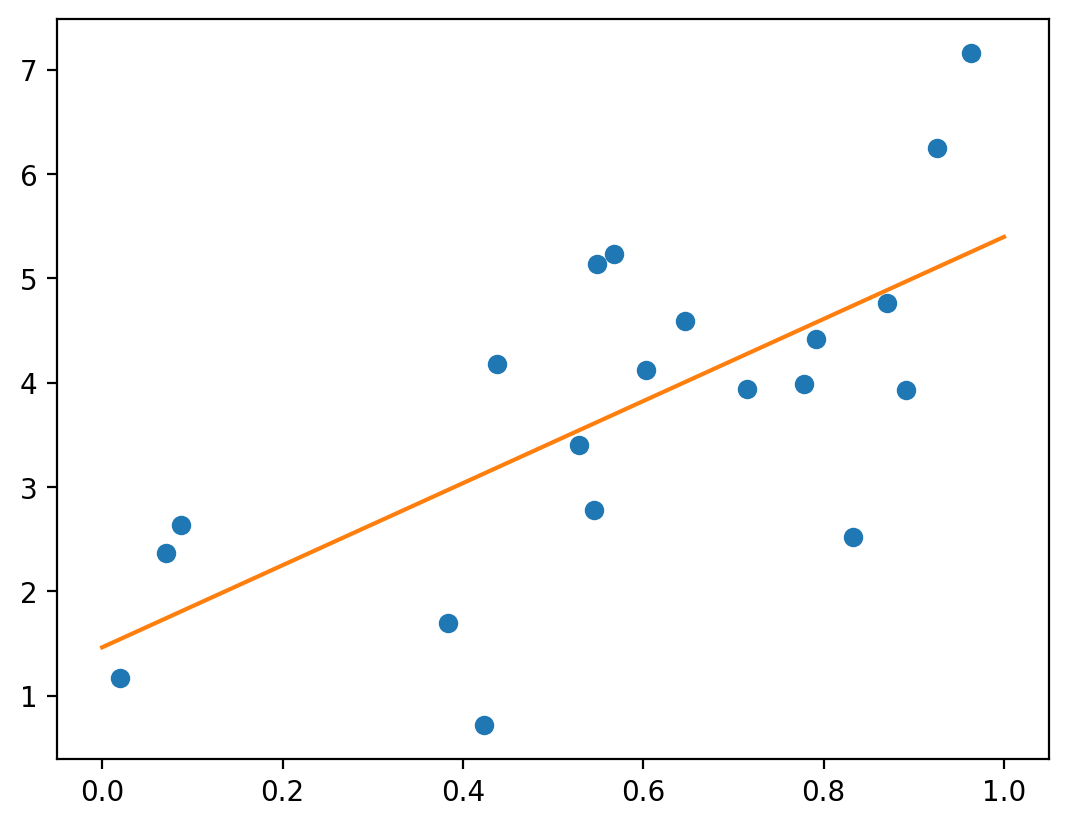

In [32]:
# Create some simple data

np.random.seed(0)
x = np.random.random(size=20) # 20 random numbers between 0 an 1
y = 3 * x + 2 + np.random.randn(20) # some operation performed on that array
X = x[:,None]

# Fit a Linear Regression
modelLR = LinearRegression()
#modelRF = 
modelLR.fit(X,y)

# Plot the data and the model prediction
x_test = np.linspace(0, 1, 100)
X_test = x_test[:,None]
y_predLR = modelLR.predict(X_test)

plt.plot(x, y, 'o')
plt.plot(X_test, y_predLR)
plt.show()

Modify the above code to add a line using the [`RandomForestRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) imported from `sklearn.ensemble` as well.

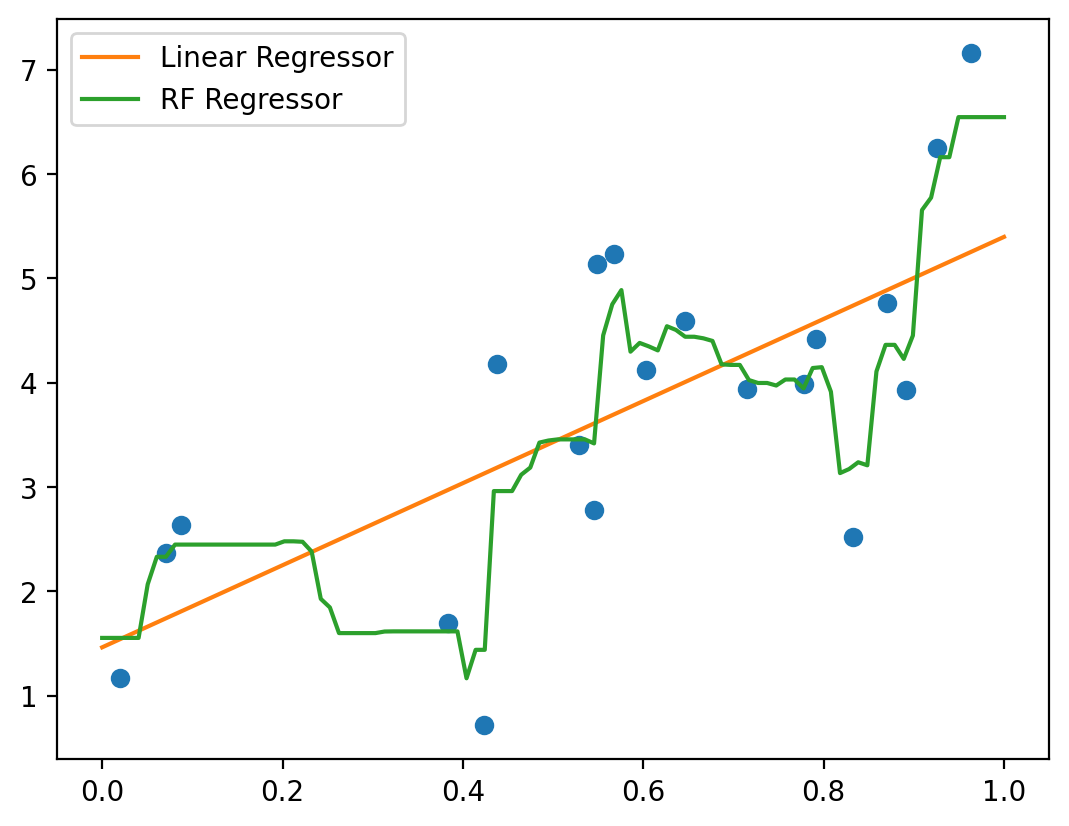

In [33]:
# Create some simple data

from sklearn.ensemble import RandomForestRegressor

np.random.seed(0)
x = np.random.random(size=20) # 20 random numbers between 0 an 1
y = 3 * x + 2 + np.random.randn(20) # some operation performed on that array
X = x[:,None]

# Fit a Linear Regression
modelLR = LinearRegression()
modelRF = RandomForestRegressor()
modelLR.fit(X,y)
modelRF.fit(X,y)

# Plot the data and the model prediction
x_test = np.linspace(0, 1, 100)
X_test = x_test[:,None]
y_predLR = modelLR.predict(X_test)
y_predRF = modelRF.predict(X_test)

plt.plot(x, y, 'o')
plt.plot(X_test, y_predLR, label='Linear Regressor')
plt.plot(X_test, y_predRF, label = 'RF Regressor')
plt.legend()
plt.show()

## Unsupervised Learning: Dimensionality Reduction and Clustering

**Unsupervised Learning** addresses a different sort of problem. 
- Here the data has no labels.
- We are interested in finding similarities between the objects in question. 
- In a sense, you can think of unsupervised learning as ***a means of discovering labels from the data itself***.

Unsupervised learning comprises tasks such as ***dimensionality reduction***, ***clustering***, and
***density estimation***. 

For example, in the iris data discussed above, we can use unsupervised methods to determine combinations of the measurements which best display the structure of the data. As we'll see below, such a projection of the data can be used to visualize the four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:

- given detailed observations of distant galaxies, determine which features or combinations of
  features best summarize the information.
  
  
- given a mixture of two sound sources (for example, a person talking over some music),
  separate the two (this is called the [blind source separation](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
  
  
- given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.

Sometimes the two may even be combined: e.g., unsupervised learning can be used to find useful
features in heterogeneous data, and then these features can be used within a supervised
framework.

### Dimensionality Reduction: PCA

**[Principle Component Analysis (PCA)](http://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca)** is a dimension reduction technique that can find the combinations of variables that explain the most variance.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it.

The process starts in the same way as the other Scikit-Learn examples that we have done:

In [34]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [35]:
pca.transform?

Signature: pca.transform(X)
Docstring:
Apply dimensionality reduction to X.

X is projected on the first principal components previously extracted
from a training set.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    New data, where `n_samples` is the number of samples
    and `n_features` is the number of features.

Returns
-------
X_new : array-like of shape (n_samples, n_components)
    Projection of X in the first principal components, where `n_samples`
    is the number of samples and `n_components` is the number of the components.
File:      ~/miniconda3/envs/astr3300/lib/python3.12/site-packages/sklearn/decomposition/_base.py
Type:      method

But now we can't do a `predict` step since we don't have training data.  Instead we are going to use the `transform()` method.  But first let's take a look at the [parameters, attributes, and methods for PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA).

In [36]:
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
            c=y, cmap='viridis')

print("Projection of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name) for value, name in 
                     zip(component, iris.feature_names)))

Reduced dataset shape: (150, 2)
Projection of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


In [37]:
print(X_reduced)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

- **This projection maximizes the separation of the classes.** 
- We can use this either just for visualization or to actually help define the classes.
- From the separation of points in the PCA projection, we can easily see three distinct classes.

### Clustering: K-means

**[Clustering](http://scikit-learn.org/stable/modules/clustering.html)** groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.

Note that these clusters will uncover relevent hidden structure of the data only if the criterion used highlights it.

Let's look at ***[`KMeans`](http://scikit-learn.org/stable/modules/clustering.html#k-means)***.  Note that here the [parameters, attributes, and methods](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) allow for *either* `predict` or `transform`.

<font color='red'>Implement K-means with `n_clusters=3` and `random_state=0`, so that everyone should get the same answer for a 3 cluster solution.</font>

In [44]:
from sklearn.cluster import KMeans

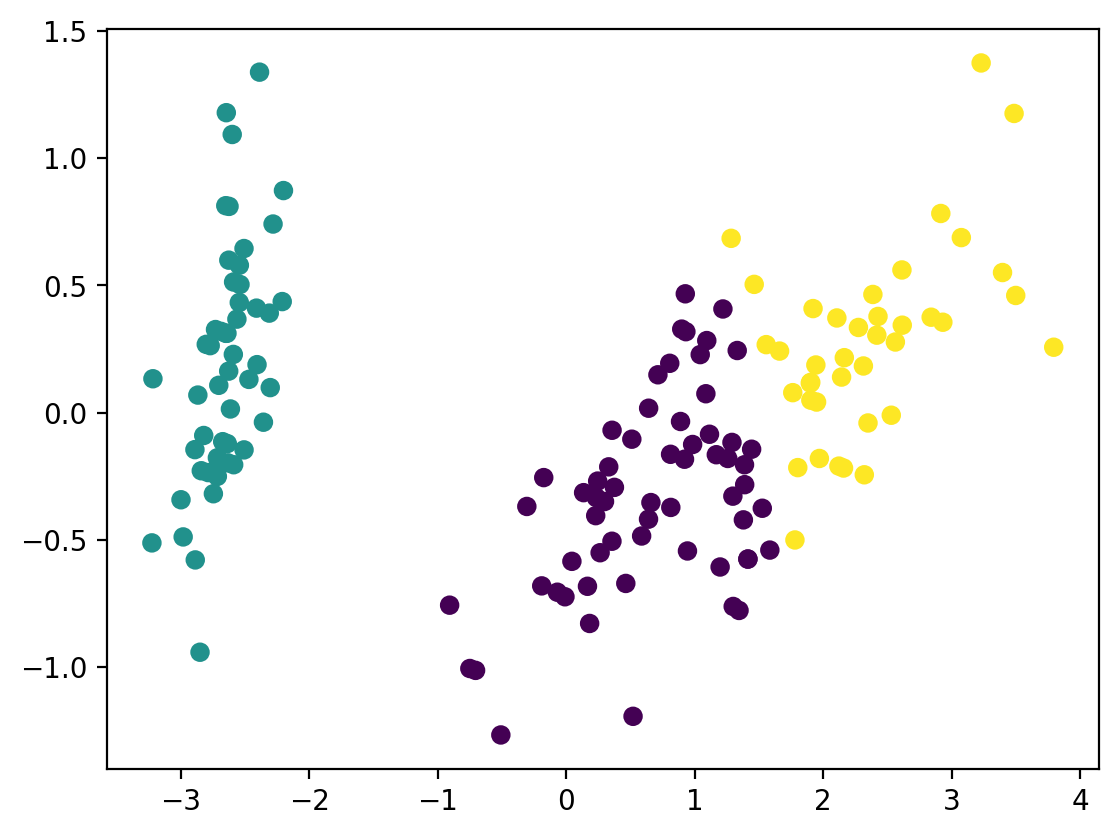

In [45]:
k_means = KMeans(n_clusters=3,random_state=0) # Complete
k_means.fit(X_reduced)
y_pred = k_means.predict(X_reduced)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
            c=y_pred, cmap='viridis');
plt.show()

So `Kmeans` did roughly what we might have expected by eye from the application of `PCA`.  The green objects are all classified correctly, but there are some errors on the yellow-blue border.

### Recap: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface (API) across all methods, and we'll see examples of these below. Given a scikit-learn ***estimator*** object named `model`, the following methods are available:

- Available in **all Estimators**
     - `model.fit()`: fit training data. For supervised learning applications, this accepts two arguments: the data `X` and the labels `y` [e.g., `model.fit(X, y)`].  For unsupervised learning applications, this accepts only a single argument, the data `X` [e.g., `model.fit(X)`].
  
  
- Available in **supervised estimators**
    - `model.predict()`: given a trained model, predict the label of a new set of data. This method accepts one argument, the new data `X_new` [e.g., `model.predict(X_new)`], and returns the learned label for each object in the array.
    - `model.predict_proba()`: For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by `model.predict()`.
    - `model.score()`: For classification or regression problems, most (all?) estimators implement a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
    
    
- Available in **unsupervised estimators**
    - `model.transform()`: given an unsupervised model, transform new data into the new basis. This also accepts one argument `X_new`, and returns the new representation of the data based on the unsupervised model.
    - `model.fit_transform()`: some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

## Model Validation

An important aspect of ML is **model validation**:
> *determining how well your model will generalize from the training data to future unlabeled data.* 

Let's look at an example using the ***nearest neighbor classifier***. This is a very simple classifier. It stores all training data, and for any unknown quantity, simply returns the label of the closest training point.

With the iris data, it very easily returns the correct prediction for each of the input points:

In [46]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print('Element-wise check: ' + str(y==y_pred))
print('All-at-once check: ' + str(np.all(y == y_pred))) # To check all at once.

Element-wise check: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
All-at-once check: True


See what happens if we used more than the first nearest neighbor.

A more useful way to look at the results is to view the **confusion matrix**, or the matrix showing the frequency of inputs and outputs:

In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


Read each element of the matrix as "*the number of observations known to be in row-$i$ and predicted to be in column-$j$*".

For each class, all 50 training samples are correctly identified. But this **does not mean that our model is perfect!** In particular, such a model generalizes extremely poorly to new data. We can simulate this by splitting our data into a ***training set*** and a ***test set***. Scikit-learn contains some convenient routines to do this: here we will apply [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split):

In [48]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[13  0  0]
 [ 0 13  0]
 [ 0  1 11]]


This paints a better picture of the true performance of our classifier: apparently there is some confusion between the second and third species, which we might anticipate given what we've seen of the data above.

This is why it's **extremely important** to use a train/test split when evaluating your models.  We'll go into more depth on model evaluation later.

## One Last Example

Sometimes you might want to apply multiple ML techniques. For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well.  So, you might want to start with a clustering or dimensional reduction algorithm first.

Let's take a look at a really cool data set/example.

### Handwritten numbers data set

Another built-in Scikit-Learn data set is the [handwritten digits data set](http://scikit-learn.org/stable/datasets/index.html#optical-recognition-of-handwritten-digits-data-set).

In [49]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


Let's plot a few of the images:

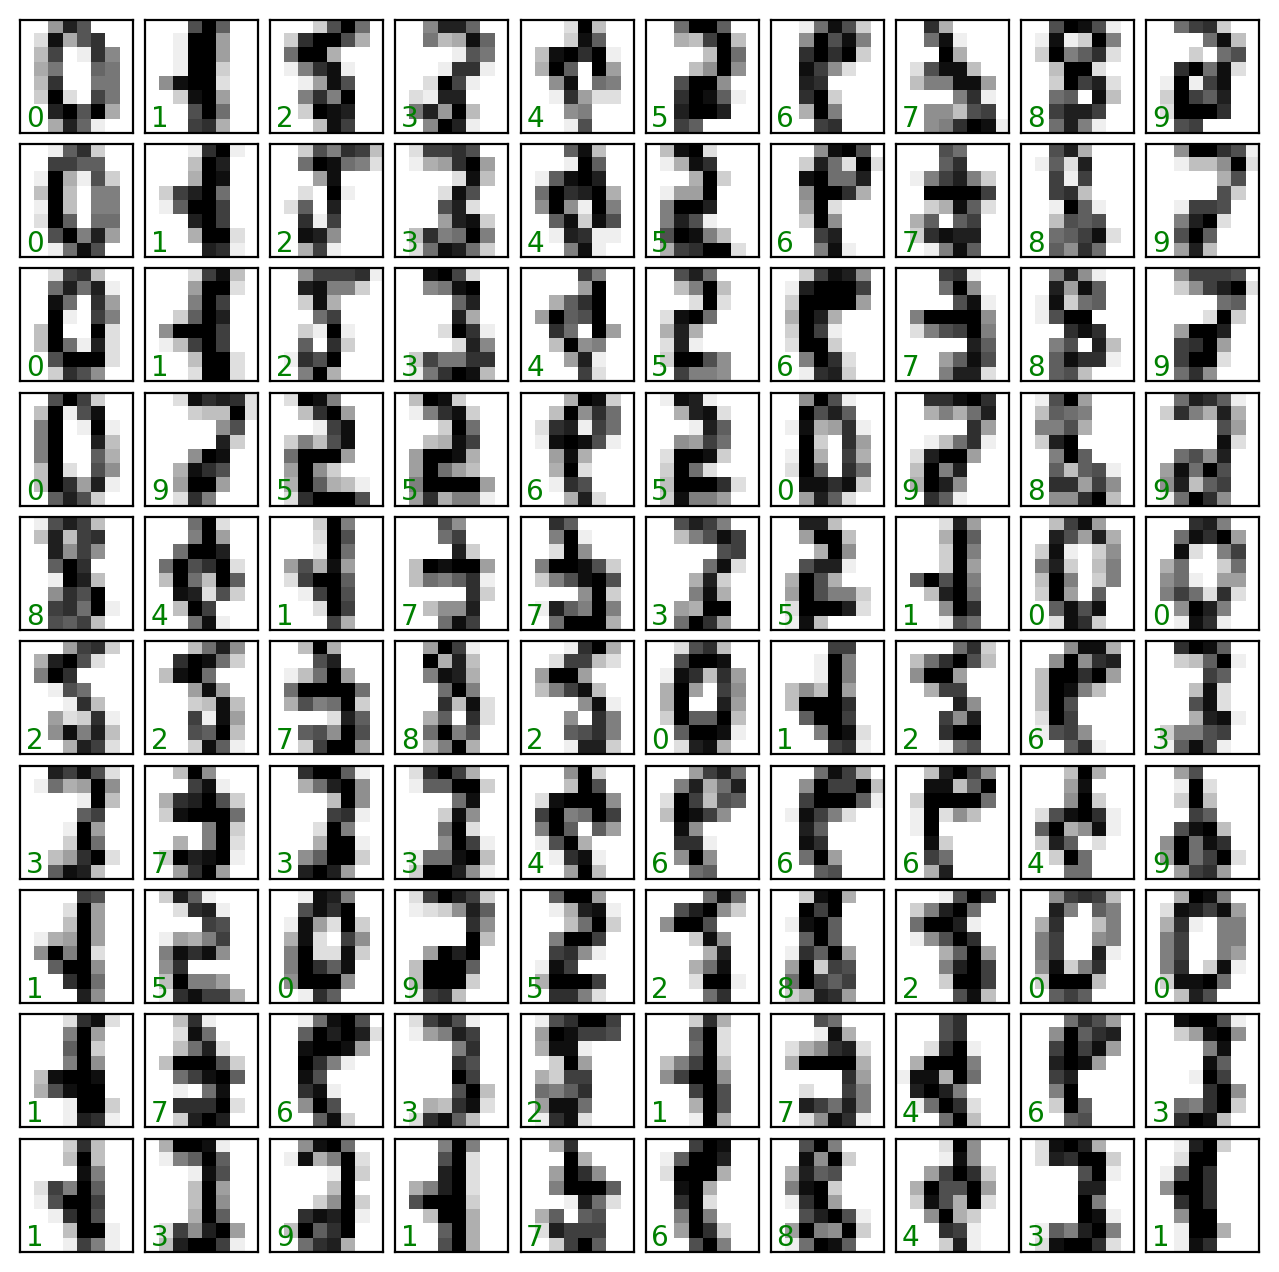

In [56]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.flipud(digits.images[i]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]), 
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Here the data is simply each pixel value within an $8\times 8$ grid.  For analysis, we don't care about the $2$-D nature of the image, we can just treat it as an $8\times8=64$ dimensional array. So our data have $1797$ samples in $64$ dimensions.

Then each of the $1797$ ***images*** has a label.

In [57]:
print(digits.data.shape)

# The images themselves
print(digits.images[0])

# The data for use in our algorithms
print(digits.data[0])

# The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]
0


### Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in 64 dimensions! 

Instead we'll use a unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**:

In [58]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)
data_projected.shape

/Users/tejassewak/miniconda3/envs/astr3300/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/tejassewak/miniconda3/envs/astr3300/lib/python3.12/site-packages/scipy/sparse/_index.py:155: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

`Isomap` has turned our $1797\times 64$ dimensional data set into a $1797\times 2$ dimensional data set. This is much easier to visualize! Now let's see if that visualization is at all helpful.

/var/folders/jr/6thm8wn52bv9_gbqq6c_j_ph0000gn/T/ipykernel_8605/2119437992.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10));


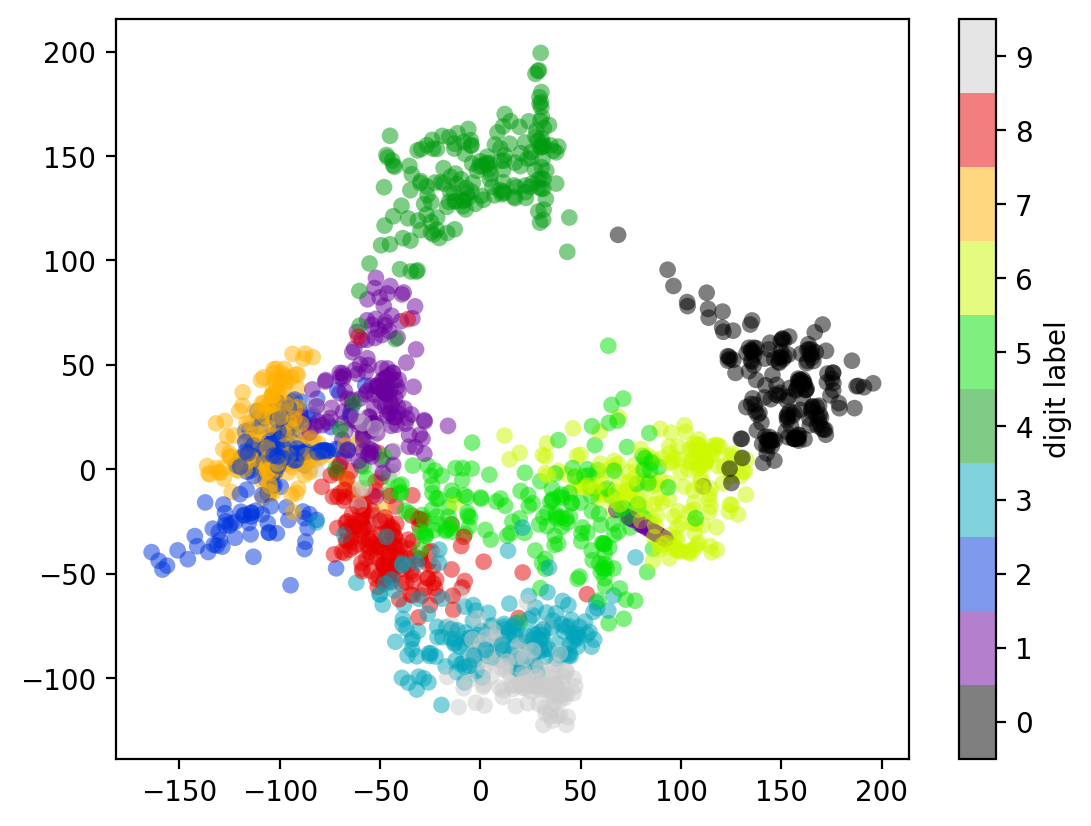

In [61]:
# Plot all of the data points in the two projected dimensions.  
# Color the points by their labels.
plt.scatter(data_projected[:,0], data_projected[:,1], 
            c=digits.target, edgecolor='none', alpha=0.5, 
            cmap=plt.cm.get_cmap('nipy_spectral', 10));

# Add the color bar
plt.colorbar(label='digit label', ticks=range(10))

# Make it clear which color goes with which label
plt.clim(-0.5, 9.5)
plt.show()

We see here that the digits are fairly well-separated in the parameter space. This tells us that a supervised classification algorithm should perform fairly well. Let's give it a try.

### Supervised Learning: Classification on Digits

The first thing we'll want to do before attempting to classify the digits is to split the digits into a training and testing sample:

In [62]:
from sklearn.model_selection import train_test_split

# taking 80% of the data as a training set
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, 
                                                random_state=2, train_size=0.8)
print(Xtrain.shape, Xtest.shape)

(1437, 64) (360, 64)


Let's use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which (despite its name) is a classification algorithm:

In [63]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', max_iter=2000)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

We can **check our classification accuracy by comparing the true values of the test set to the predictions**.  We'll use one of sklearn's built-in [metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9472222222222222

This single number doesn't tell us ***where*** we've gone wrong: one nice way to do this is to use the ***confusion matrix*** as we did above.

[[31  0  0  0  1  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  2  0]
 [ 0  0  0  0 31  0  0  0  3  1]
 [ 0  1  0  0  1 41  0  0  0  0]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  1 25]]


/var/folders/jr/6thm8wn52bv9_gbqq6c_j_ph0000gn/T/ipykernel_8605/2019798471.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(ytest, ypred)),


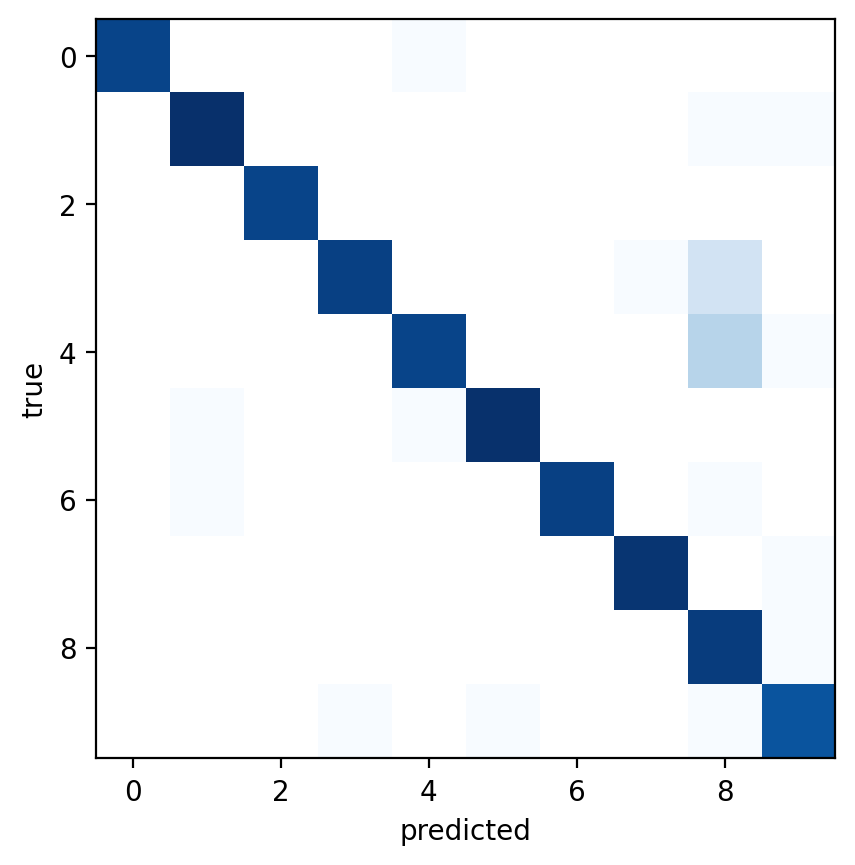

In [67]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), 
           cmap='Blues', interpolation='nearest')
plt.ylabel('true')
plt.xlabel('predicted');
plt.show()

- So, that's $31$ "$0$"s were classified as "$0$", while one of them was classified as a "$4$", and no non-zero digits were so classified.


- $41$ "$1$"s were classified correctly, but one each were classified as a "$3$", "$8$", and "$9$".


- Moreover, one "$5$" and one "$6$" were classified as "$1$"s.


- And so on.


We can look at some of the outputs along with their predicted labels, making the bad labels red:

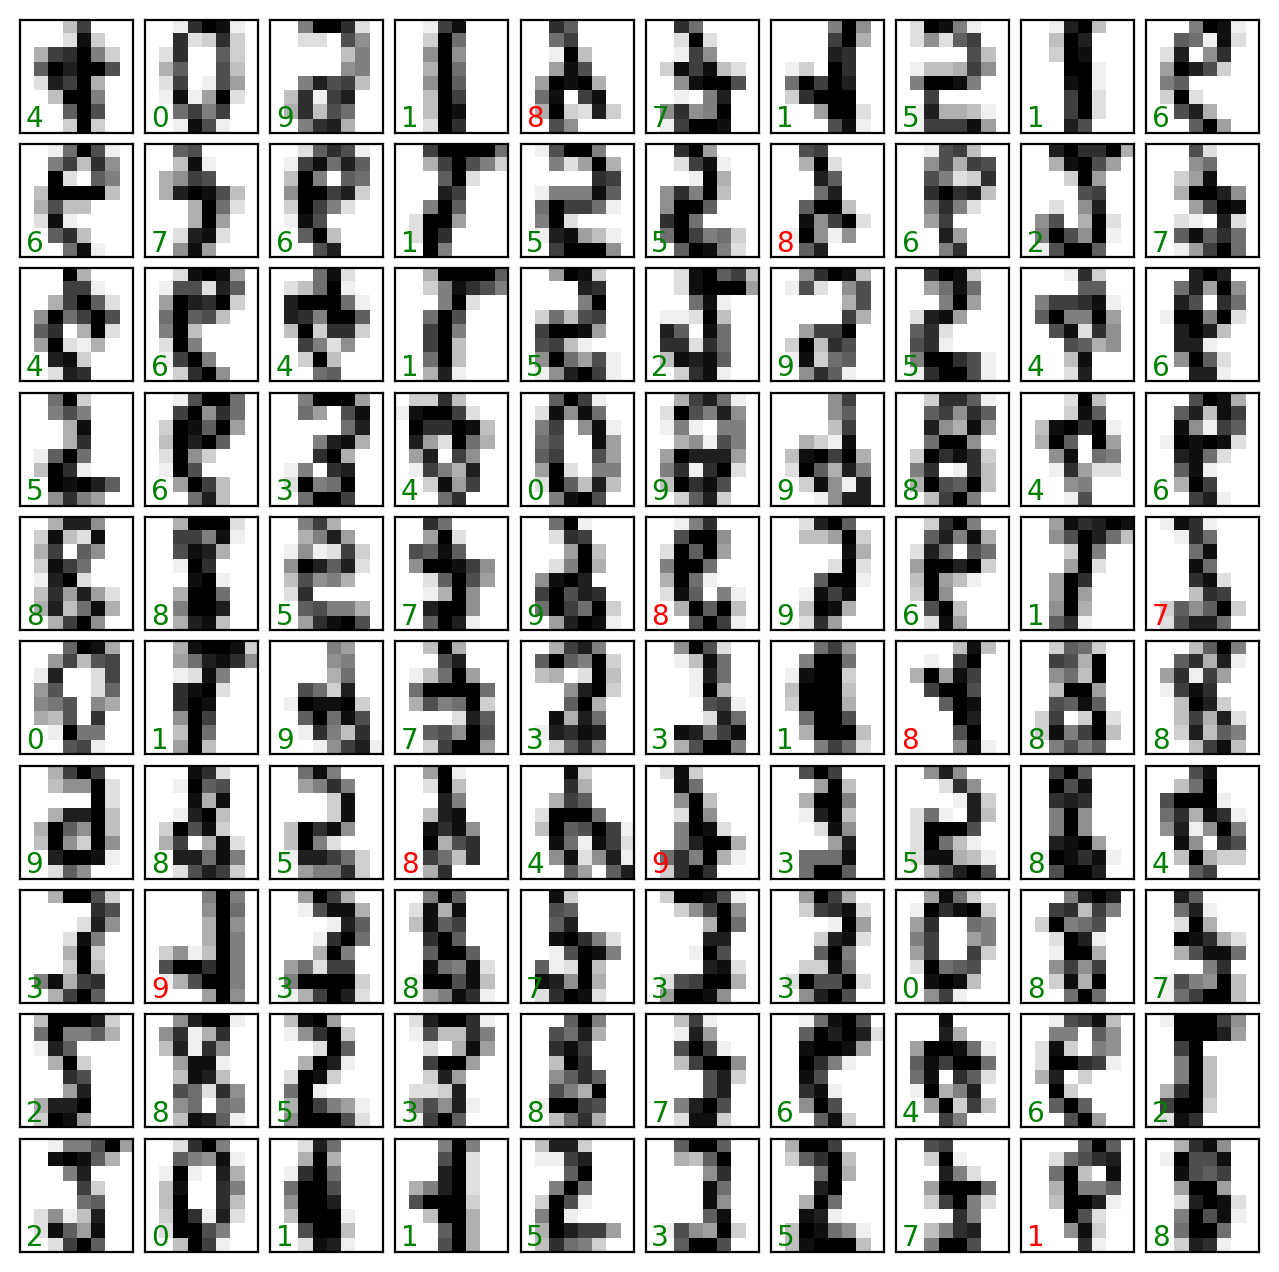

In [70]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.flipud(Xtest[i].reshape(8, 8)), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]), transform=ax.transAxes, 
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

The interesting thing is that even with this simple logistic regression algorithm, some of the mislabeled cases are ones that we ourselves might get wrong!

There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weeks.

## Flow Chart: How to Choose your Estimator

In the mean time, I remind you of this the [Scikit-Learn algorithm cheat sheet](http://scikit-learn.org/stable/tutorial/machine_learning_map/) which gives a nice summary of which algorithms to choose in various situations.

![](https://scikit-learn.org/stable/_downloads/b82bf6cd7438a351f19fac60fbc0d927/ml_map.svg)